In [8]:
#Load necessary modules
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from collections import OrderedDict 
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches, text, patheffects
import cv2
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#Load JSON file of Labelbox labels
path = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/originals/labelbox.json"
with open(path) as f:
  usfws = json.load(f)

In [27]:
xlist = []
for i in usfws[0]["Label"]["Sandhill Crane"][2]["geometry"]:
    xlist.append(list(i.values()))
print(xlist)

[[4633, 1610], [4722, 1662], [4696, 1717], [4597, 1671], [4627, 1619]]


In [28]:
#pulled from here: https://techoverflow.net/2017/02/23/computing-bounding-box-for-a-list-of-coordinates-in-python/
coords = np.asarray(xlist)
from UliEngineering.Math.Coordinates import BoundingBox
bbox1 = BoundingBox(coords)
bbox1

BoundingBox(4597, 4722, 1610, 1717)

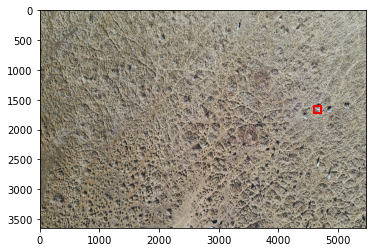

In [29]:
testimg = "BDA_12C_20181127_1.JPG"

#Display bounding boxes on image for verification

#TEST: ONE BOX

fig, ax = plt.subplots()

img = cv2.imread(str('/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Imagery/USFWS/raw/BDA_12C_20181127_1.JPG'))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ax.imshow(img)

x = bbox1.minx
y = bbox1.miny
w = bbox1.width
h = bbox1.height

x1 = x+(w/2)
y1 = y+(h/2)

ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
#ax.scatter(x1, y1)